# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [8]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/DataScience/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

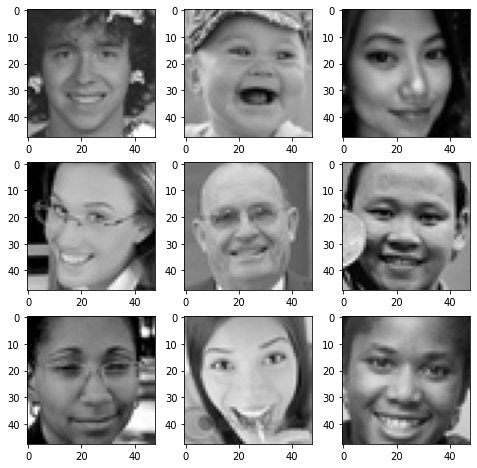

In [ ]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**



*   9 black and white images of happy human faces. 
*   The images are cropped around just the face, but there is some background material. All faces are well lit, all faces are largely in a normal orientation, with some tilt. All faces are in normal, consistent proportion. Most, but not all faces are angled directly at the camera, this may cause problems with faces in usual orientation.
*   Caucasian, Asian and Black faces are in the dataset. Male and female faces are in the dataset. Youth to old faces are in the dataset. Some are wearing glasses and some images have interfering features.  
*   Most, but not all, faces have teeth showing in a smile. This may be a feature that the neural network percieves. Consequently, those happy faces which do not have teeth showing may be misclassified.
*   Most, but not all, faces have the corners of their mouth clearly turned up. This may be a feature that the neural network percieves. Consequently, those happy faces which do not have the corners of their mouth clearly turned up may be misclassified. 
*   Most, but not all, faces have their eyes in a generally open manner, eyebrows up, with some slight squinting due to their smile, eyes looking directly into the camera. This may be feature that the neural network percieves. Consequently, those happy faces which do not clearly have eyes with similar features may be misclassified. 









### **Sad**

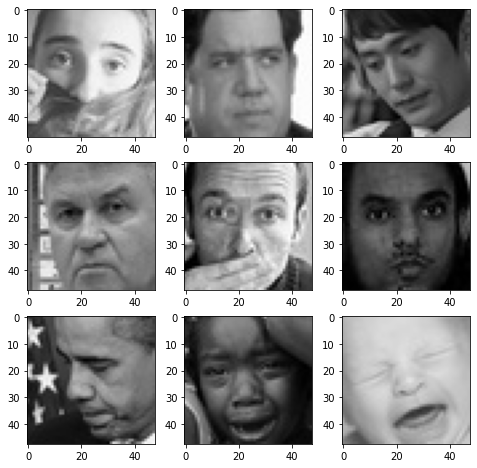

In [ ]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**

*   9 black and white images of sad human faces. 
*   The images are cropped around just the face, but there is some background material. Most faces are well lit, most faces are largely in a normal orientation, with some tilt. All faces are in normal, consistent proportion. Most, but not all, faces are angled directly at the camera, this may cause problems with faces in usual orientation.
*   Caucasian, Asian and Black faces are in the dataset. Male and female faces are in the dataset. Youth to old faces are in the dataset. Some images have interfering features such as hair in front of the face or superimposed letters.  
*   Most, but not all, faces do not have teeth showing in a smile. This may be a feature that the neural network percieves. Consequently, those sad faces which have teeth showing may be misclassified.
*   Most, but not all, faces have the corners of their mouth clearly turned down, with tight lips and narrow mouth. These may be features that the neural network percieves. Consequently, those sad faces which do not clearly have mouths with similar features may be misclassified. 
*   Most, but not all, faces have their eyes in a generally restricted manner, eyebrows down, eyes looking away from the camera. These may be features that the neural network percieves. Consequently, those sad faces which do not clearly have eyes with similar features may be misclassified. 

### **Neutral**

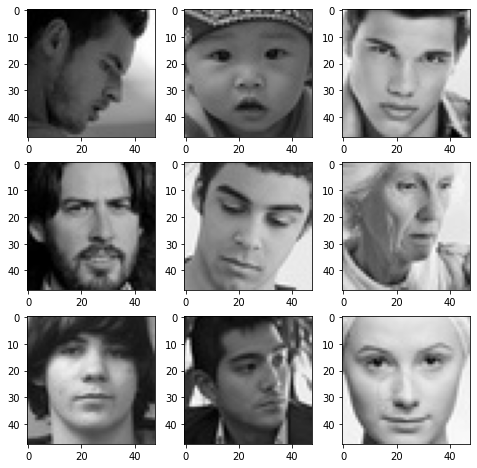

In [ ]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**

*   9 black and white images of neutral expression human faces. 
*   The images are cropped around just the face, but there is some background material. Most faces are well lit, most faces are largely in a normal orientation, with some tilt. Most faces are in normal, consistent proportion. Most, but not all, faces are angled directly at the camera, this may cause problems with faces in usual orientation.
*   Caucasian, Asian and Black faces are in the dataset. Male and female faces are in the dataset. Youth to old faces are in the dataset. 
*   Most, but not all, faces do not have teeth showing in a smile. This may be a feature that the neural network percieves. Consequently, those neutral faces which have teeth showing may be misclassified.
*   Most, but not all, faces have the corners of their mouth mostly straight, with narrow lips and wide mouth. These may be features that the neural network percieves. Consequently, those neutral faces which do not clearly have mouths with similar features may be misclassified. 
*   Most faces have their eyes in a open manner, eyebrows relaxed, eyes looking either away from or into the camera. These may be features that the neural network percieves. Consequently, those neutral faces which do not clearly have eyes with similar features may be misclassified. 

### **Surprised**

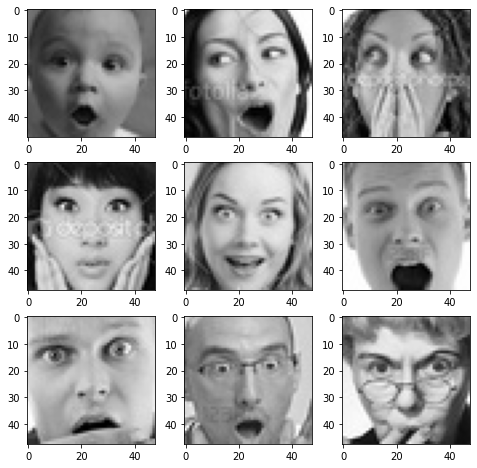

In [35]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**

*   9 black and white images of surprised expression human faces. 
*   The images are cropped around just the face, but there is some background material. Most faces are well lit, most faces are largely in a normal orientation, with some tilt. Most faces are in normal, consistent proportion. Most, but not all, faces are angled directly at the camera. Many of the images have interfering text or images superimposed over the face, this may cause problems with detecting the emotion on the face. 
*   Caucasian, Asian and Black faces are in the dataset. Male and female faces are in the dataset. Youth to old faces are in the dataset. 
*   Most, but not all, faces do not have teeth showing. This may be a feature that the neural network percieves. Consequently, those surprised expression faces which have teeth showing may be misclassified.
*   Most, but not all, faces have a open mouth, in an almost circle shape, drawing the cheeks down. These may be features that the neural network percieves. Consequently, those surprised expression faces which do not clearly have similar open mouths may be misclassified. 
*   Most faces have their eyes in a open manner, eyebrows arched and high in the forehead, eyes usually looking into the camera. These may be features that the neural network percieves. Consequently, those surprised expression faces which do not clearly have eyes with similar features may be misclassified. 

## **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


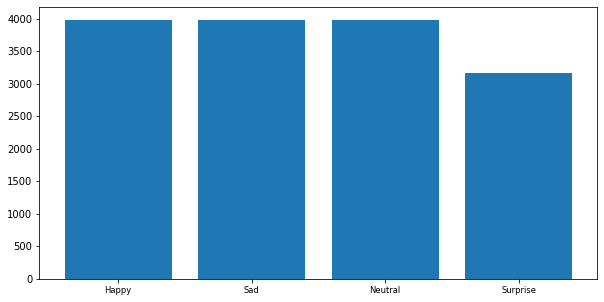

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:**



*   In general the dataset appears to be quite balanced, with each category having approximately the same number of images. The 'Surprise' category is the outlier with with about 25% less images than the other categories but this is not likely to be signficant as it still contains thousands of images which should be enough to adaquately train the model without unbalancing it due to a lack of surprise expression images.

*   Accuracy should be a good evaluation metric for the model performance in this case study.




**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set_rgb = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

train_set_greyscale = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set_rgb = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

validation_set_greyscale = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set_rgb = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

test_set_greyscale = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [9]:
# Initializing a Sequential Model for RGB images

model1_rgb = Sequential()

# Add the first Convolutional block
model1_rgb.add(Conv2D(64, (2, 2), activation='relu', input_shape = (48, 48, 3), padding = 'same'))
model1_rgb.add(MaxPooling2D(2, 2))
model1_rgb.add(Dropout(0.2))

# Add the second Convolutional block
model1_rgb.add(Conv2D(32, (2, 2), activation = 'relu', padding = 'same'))
model1_rgb.add(MaxPooling2D(2, 2))
model1_rgb.add(Dropout(0.2))

# Add the third Convolutional block
model1_rgb.add(Conv2D(32, (2, 2), activation = 'relu', padding = 'same'))
model1_rgb.add(MaxPooling2D(2, 2))
model1_rgb.add(Dropout(0.2))

# Add the Flatten layer
model1_rgb.add(Flatten())

# Add the first Dense layer
model1_rgb.add(Dense(512, activation = 'relu'))
model1_rgb.add(Dropout(0.4))

# Add the Final layer
model1_rgb.add(Dense(4, activation = 'softmax'))

model1_rgb.summary()


# Initializing a Sequential Model for Greyscale images
model1_greyscale = Sequential()

# Add the first Convolutional block
model1_greyscale.add(Conv2D(64, (2, 2), activation = 'relu', input_shape = (48, 48, 1), padding = 'same'))
model1_greyscale.add(MaxPooling2D(2, 2))
model1_greyscale.add(Dropout(0.2))

# Add the second Convolutional block
model1_greyscale.add(Conv2D(32, (2, 2), activation = 'relu', padding = 'same'))
model1_greyscale.add(MaxPooling2D(2, 2))
model1_greyscale.add(Dropout(0.2))

# Add the third Convolutional block
model1_greyscale.add(Conv2D(32, (2, 2), activation = 'relu', padding = 'same'))
model1_greyscale.add(MaxPooling2D(2, 2))
model1_greyscale.add(Dropout(0.2))

# Add the Flatten layer
model1_greyscale.add(Flatten())

# Add the first Dense layer
model1_greyscale.add(Dense(512, activation = 'relu'))
model1_greyscale.add(Dropout(0.4))

# Add the Final layer
model1_greyscale.add(Dense(4, activation = 'softmax'))

model1_greyscale.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1_rgb.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20


In [11]:
# Compile model1_rgb and model1_greyscale. Using categorical crossentropy as your loss function, Adam Optimizer with 0.001 learning rate, and set your metrics to 'accuracy'. 
model1_rgb.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model1_greyscale.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Fitting model1_rgb and model1_greyscale. Using train_set as training data and validation_set as validation data. Training model for 20 epochs.

history_rgb = model1_rgb.fit(train_set_rgb, validation_data = validation_set_rgb, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)

history_greyscale = model1_greyscale.fit(train_set_greyscale, validation_data = validation_set_greyscale, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)



Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3612 - accuracy: 0.3058

473/473 [==============================] - 95s 198ms/step - loss: 1.3612 - accuracy: 0.3058 - val_loss: 1.2589 - val_accuracy: 0.4055 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2418 - accuracy: 0.4321

473/473 [==============================] - 88s 187ms/step - loss: 1.2418 - accuracy: 0.4321 - val_loss: 1.1385 - val_accuracy: 0.5166 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1621 - accuracy: 0.4852

473/473 [==============================] - 90s 191ms/step - loss: 1.1621 - accuracy: 0.4852 - val_loss: 1.0724 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.1017 - accuracy: 0.5112

473/473 [==============================] - 88s 185ms/step - loss: 1.1017 - accuracy: 0.5112 - val_loss: 1.0303 - val_accuracy: 0.5666 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.0548 - accuracy: 0.5425

473/473 [==============================] - 91s 191ms/step - loss: 1.0548 - accuracy: 0.5425 - val_loss: 1.0333 - val_accuracy: 0.5650 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.0223 - accuracy: 0.5587

473/473 [==============================] - 88s 185ms/step - loss: 1.0223 - accuracy: 0.5587 - val_loss: 0.9425 - val_accuracy: 0.6086 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 0.9935 - accuracy: 0.5691

473/473 [==============================] - 87s 184ms/step - loss: 0.9935 - accuracy: 0.5691 - val_loss: 0.9092 - val_accuracy: 0.6156 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.9772 - accuracy: 0.5795

473/473 [==============================] - 89s 188ms/step - loss: 0.9772 - accuracy: 0.5795 - val_loss: 0.8953 - val_accuracy: 0.6279 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.9568 - accuracy: 0.5848

473/473 [==============================] - 87s 183ms/step - loss: 0.9568 - accuracy: 0.5848 - val_loss: 0.9003 - val_accuracy: 0.6247 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.9487 - accuracy: 0.5949

473/473 [==============================] - 88s 186ms/step - loss: 0.9487 - accuracy: 0.5949 - val_loss: 0.8780 - val_accuracy: 0.6329 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.9293 - accuracy: 0.6029

473/473 [==============================] - 90s 191ms/step - loss: 0.9293 - accuracy: 0.6029 - val_loss: 0.9122 - val_accuracy: 0.6199 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 0.9088 - accuracy: 0.6127

473/473 [==============================] - 88s 185ms/step - loss: 0.9088 - accuracy: 0.6127 - val_loss: 0.8684 - val_accuracy: 0.6414 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.9020 - accuracy: 0.6153

473/473 [==============================] - 90s 191ms/step - loss: 0.9020 - accuracy: 0.6153 - val_loss: 0.8264 - val_accuracy: 0.6590 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 0.8896 - accuracy: 0.6231

473/473 [==============================] - 87s 183ms/step - loss: 0.8896 - accuracy: 0.6231 - val_loss: 0.8519 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 15/20
473/473 [==============================] - ETA: 0s - loss: 0.8865 - accuracy: 0.6277

473/473 [==============================] - 90s 189ms/step - loss: 0.8865 - accuracy: 0.6277 - val_loss: 0.8064 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 16/20
473/473 [==============================] - ETA: 0s - loss: 0.8704 - accuracy: 0.6332

473/473 [==============================] - 87s 184ms/step - loss: 0.8704 - accuracy: 0.6332 - val_loss: 0.8127 - val_accuracy: 0.6594 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.8707 - accuracy: 0.6349

473/473 [==============================] - 89s 187ms/step - loss: 0.8707 - accuracy: 0.6349 - val_loss: 0.7984 - val_accuracy: 0.6727 - lr: 0.0010
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 0.8522 - accuracy: 0.6424

473/473 [==============================] - 87s 183ms/step - loss: 0.8522 - accuracy: 0.6424 - val_loss: 0.8100 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 0.8461 - accuracy: 0.6458

473/473 [==============================] - 88s 185ms/step - loss: 0.8461 - accuracy: 0.6458 - val_loss: 0.8002 - val_accuracy: 0.6735 - lr: 0.0010
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 0.8351 - accuracy: 0.6499Restoring model weights from the end of the best epoch: 17.



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
473/473 [==============================] - 89s 189ms/step - loss: 0.8351 - accuracy: 0.6499 - val_loss: 0.8161 - val_accuracy: 0.6685 - lr: 0.0010
Epoch 20: early stopping
Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3736 - accuracy: 0.2869

473/473 [==============================] - 76s 160ms/step - loss: 1.3736 - accuracy: 0.2869 - val_loss: 1.3280 - val_accuracy: 0.3257 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.2472 - accuracy: 0.4309

473/473 [==============================] - 76s 160ms/step - loss: 1.2472 - accuracy: 0.4309 - val_loss: 1.2020 - val_accuracy: 0.4643 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1517 - accuracy: 0.4889

473/473 [==============================] - 78s 165ms/step - loss: 1.1517 - accuracy: 0.4889 - val_loss: 1.0942 - val_accuracy: 0.5381 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.0973 - accuracy: 0.5161

473/473 [==============================] - 76s 161ms/step - loss: 1.0973 - accuracy: 0.5161 - val_loss: 1.0067 - val_accuracy: 0.5793 - lr: 0.0010
Epoch 5/20
473/473 [==============================] - ETA: 0s - loss: 1.0611 - accuracy: 0.5351

473/473 [==============================] - 75s 159ms/step - loss: 1.0611 - accuracy: 0.5351 - val_loss: 0.9840 - val_accuracy: 0.5885 - lr: 0.0010
Epoch 6/20
473/473 [==============================] - ETA: 0s - loss: 1.0312 - accuracy: 0.5501

473/473 [==============================] - 77s 164ms/step - loss: 1.0312 - accuracy: 0.5501 - val_loss: 0.9542 - val_accuracy: 0.6056 - lr: 0.0010
Epoch 7/20
473/473 [==============================] - ETA: 0s - loss: 1.0118 - accuracy: 0.5644

473/473 [==============================] - 75s 159ms/step - loss: 1.0118 - accuracy: 0.5644 - val_loss: 0.9104 - val_accuracy: 0.6132 - lr: 0.0010
Epoch 8/20
473/473 [==============================] - ETA: 0s - loss: 0.9881 - accuracy: 0.5754

473/473 [==============================] - 76s 160ms/step - loss: 0.9881 - accuracy: 0.5754 - val_loss: 0.9294 - val_accuracy: 0.6132 - lr: 0.0010
Epoch 9/20
473/473 [==============================] - ETA: 0s - loss: 0.9770 - accuracy: 0.5776

473/473 [==============================] - 78s 165ms/step - loss: 0.9770 - accuracy: 0.5776 - val_loss: 0.9243 - val_accuracy: 0.6122 - lr: 0.0010
Epoch 10/20
473/473 [==============================] - ETA: 0s - loss: 0.9584 - accuracy: 0.5820

473/473 [==============================] - 75s 159ms/step - loss: 0.9584 - accuracy: 0.5820 - val_loss: 0.8945 - val_accuracy: 0.6355 - lr: 0.0010
Epoch 11/20
473/473 [==============================] - ETA: 0s - loss: 0.9459 - accuracy: 0.5964

473/473 [==============================] - 75s 160ms/step - loss: 0.9459 - accuracy: 0.5964 - val_loss: 0.8799 - val_accuracy: 0.6385 - lr: 0.0010
Epoch 12/20
473/473 [==============================] - ETA: 0s - loss: 0.9358 - accuracy: 0.6009

473/473 [==============================] - 75s 159ms/step - loss: 0.9358 - accuracy: 0.6009 - val_loss: 0.9031 - val_accuracy: 0.6209 - lr: 0.0010
Epoch 13/20
473/473 [==============================] - ETA: 0s - loss: 0.9186 - accuracy: 0.6094

473/473 [==============================] - 78s 164ms/step - loss: 0.9186 - accuracy: 0.6094 - val_loss: 0.8559 - val_accuracy: 0.6464 - lr: 0.0010
Epoch 14/20
473/473 [==============================] - ETA: 0s - loss: 0.9101 - accuracy: 0.6131

473/473 [==============================] - 76s 160ms/step - loss: 0.9101 - accuracy: 0.6131 - val_loss: 0.8578 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 15/20
473/473 [==============================] - ETA: 0s - loss: 0.9090 - accuracy: 0.6144

473/473 [==============================] - 75s 159ms/step - loss: 0.9090 - accuracy: 0.6144 - val_loss: 0.8626 - val_accuracy: 0.6414 - lr: 0.0010
Epoch 16/20
473/473 [==============================] - ETA: 0s - loss: 0.9007 - accuracy: 0.6139

473/473 [==============================] - 78s 165ms/step - loss: 0.9007 - accuracy: 0.6139 - val_loss: 0.8484 - val_accuracy: 0.6582 - lr: 0.0010
Epoch 17/20
473/473 [==============================] - ETA: 0s - loss: 0.8818 - accuracy: 0.6293

473/473 [==============================] - 76s 160ms/step - loss: 0.8818 - accuracy: 0.6293 - val_loss: 0.8480 - val_accuracy: 0.6504 - lr: 0.0010
Epoch 18/20
473/473 [==============================] - ETA: 0s - loss: 0.8751 - accuracy: 0.6309

473/473 [==============================] - 76s 161ms/step - loss: 0.8751 - accuracy: 0.6309 - val_loss: 0.8249 - val_accuracy: 0.6675 - lr: 0.0010
Epoch 19/20
473/473 [==============================] - ETA: 0s - loss: 0.8675 - accuracy: 0.6329

473/473 [==============================] - 77s 164ms/step - loss: 0.8675 - accuracy: 0.6329 - val_loss: 0.8257 - val_accuracy: 0.6649 - lr: 0.0010
Epoch 20/20
473/473 [==============================] - ETA: 0s - loss: 0.8638 - accuracy: 0.6392

473/473 [==============================] - 75s 159ms/step - loss: 0.8638 - accuracy: 0.6392 - val_loss: 0.8172 - val_accuracy: 0.6578 - lr: 0.0010


### **Evaluating the Model on the Test Set**

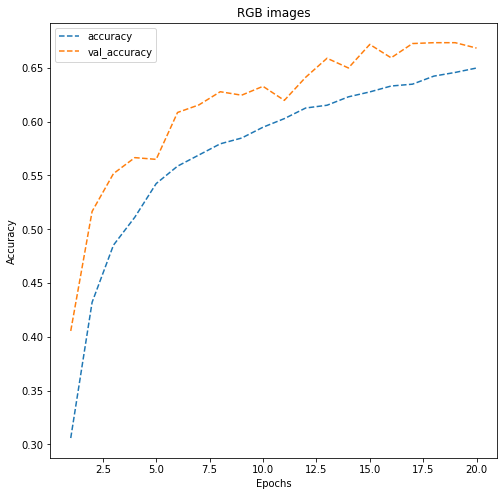

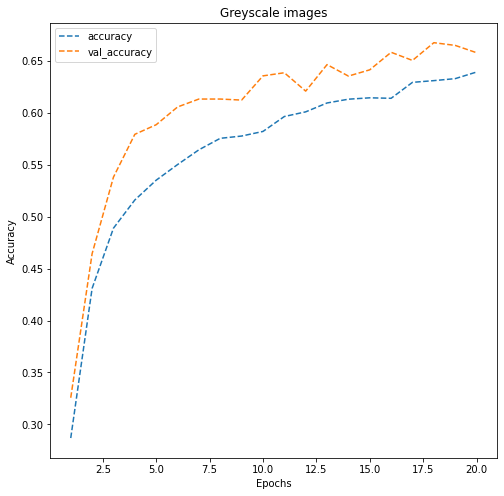

In [16]:
# Write your code to evaluate your model on test data.
# Plotting the accuracies
dict_hist = history_rgb.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('RGB images')

plt.legend()

plt.show()


dict_hist = history_greyscale.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('Greyscale images')

plt.legend()

#plt.show()



In [28]:
# Make prediction on the test data using model_1 

test_pred_rgb = model1_rgb.predict(test_set_rgb)

test_pred_rgb = np.argmax(test_pred_rgb, axis = -1)

test_pred_greyscale = model1_greyscale.predict(test_set_greyscale)

test_pred_greyscale = np.argmax(test_pred_greyscale, axis = -1)

4/4 [==============================] - 1s 109ms/step


In [94]:
#Creating one-hot encoded vector of the labels
FacesLabel_vector = np.concatenate((test_set_rgb[0][1],test_set_rgb[1][1],test_set_rgb[2][1],test_set_rgb[3][1]))
print(FacesLabel_vector)

# Converting each entry to single label from one-hot encoded vector

FacesLabel_single = np.argmax(FacesLabel_vector, axis = -1)
print(FacesLabel_single)

FacesLabel_single.shape

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0.

(128,)

In [60]:
#Viewing a test image
print(test_set_rgb[0][0][0])
print(test_set_rgb[0][0][0].shape)

[[[0.0627451  0.0627451  0.0627451 ]
  [0.06666667 0.06666667 0.06666667]
  [0.07843138 0.07843138 0.07843138]
  ...
  [0.0627451  0.0627451  0.0627451 ]
  [0.06666667 0.06666667 0.06666667]
  [0.0509804  0.0509804  0.0509804 ]]

 [[0.07843138 0.07843138 0.07843138]
  [0.07843138 0.07843138 0.07843138]
  [0.08235294 0.08235294 0.08235294]
  ...
  [0.08235294 0.08235294 0.08235294]
  [0.0627451  0.0627451  0.0627451 ]
  [0.0509804  0.0509804  0.0509804 ]]

 [[0.07058824 0.07058824 0.07058824]
  [0.09019608 0.09019608 0.09019608]
  [0.09019608 0.09019608 0.09019608]
  ...
  [0.08235294 0.08235294 0.08235294]
  [0.06666667 0.06666667 0.06666667]
  [0.07843138 0.07843138 0.07843138]]

 ...

 [[0.00392157 0.00392157 0.00392157]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01568628 0.01568628 0.01568628]]

 [[0.00392157 0.00392157 0.00392157]
  [0.         0.         0.        ]


This image has one-hot encoded labels vector of:
[0. 1. 0. 0.]


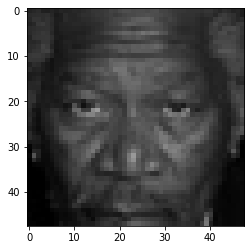

In [77]:
#Viewing the first image
plt.imshow(test_set_rgb[0][0][0]) 
print("This image has one-hot encoded labels vector of:" )
print(FacesLabel_vector[0])


This image has one-hot encoded labels vector of:
[1. 0. 0. 0.]


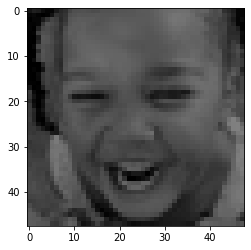

In [78]:
#Viewing the second image
plt.imshow(test_set_rgb[0][0][1]) 
print("This image has one-hot encoded labels vector of:" )
print(FacesLabel_vector[1])


This image has one-hot encoded labels vector of:
[0. 1. 0. 0.]


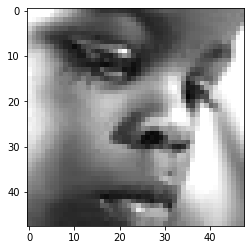

In [79]:
#Viewing the third image
plt.imshow(test_set_rgb[0][0][2]) 
print("This image has one-hot encoded labels vector of:" )
print(FacesLabel_vector[2])


This image has one-hot encoded labels vector of:
[0. 0. 0. 1.]


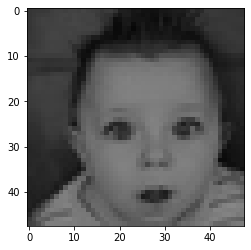

In [80]:
#Viewing the fourth image
plt.imshow(test_set_rgb[0][0][3]) 
print("This image has one-hot encoded labels vector of:" )
print(FacesLabel_vector[3])


Classification report for RGB images trained model
              precision    recall  f1-score   support

           0       0.34      0.38      0.36        32
           1       0.30      0.41      0.35        32
           2       0.24      0.16      0.19        32
           3       0.31      0.28      0.30        32

    accuracy                           0.30       128
   macro avg       0.30      0.30      0.30       128
weighted avg       0.30      0.30      0.30       128



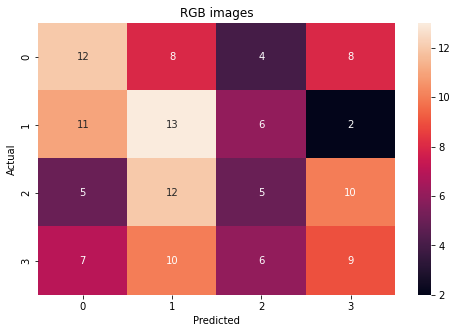

Classification report for Greyscale images trained model
              precision    recall  f1-score   support

           0       0.30      0.28      0.29        32
           1       0.25      0.41      0.31        32
           2       0.12      0.09      0.11        32
           3       0.09      0.06      0.07        32

    accuracy                           0.21       128
   macro avg       0.19      0.21      0.20       128
weighted avg       0.19      0.21      0.20       128



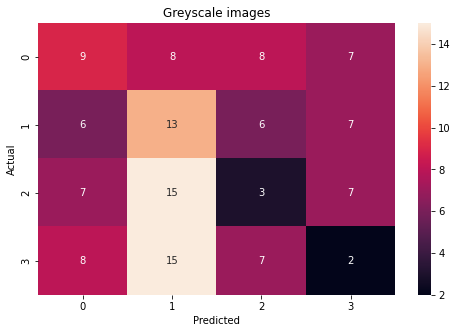

In [84]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for RGB
print("Classification report for RGB images trained model")

print(classification_report(FacesLabel_single, test_pred_rgb))

# Plotting the heatmap using confusion matrix for RGB

cm = confusion_matrix(FacesLabel_single, test_pred_rgb)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('RGB images')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

# Printing the classification report for Greyscale
print("Classification report for Greyscale images trained model")

print(classification_report(FacesLabel_single, test_pred_greyscale))

# Plotting the heatmap using confusion matrix for Greyscale

cm = confusion_matrix(FacesLabel_single, test_pred_greyscale)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('Greyscale images')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**


*   Both RGB and Greyscale images were tested. As a matter of principle, images in Greyscale could be expected to be better for face classification than those in RGB becuase of the inherently sharper features of a Greyscale image.
*   From the dump of the values for an RGB image it can be seen that the values for all three colors (Red, Green, and Blue) are the same. This is has to be expected given that the original input images were in Greyscale. This should mean that there should be little in performance difference between a model trained on RGB images verses a model trained on Greyscale images.
*   The first train vs. validation accuracy plot is the response of the RGB model, the second train vs. validation accuracy plot is the response of the Greyscale model.  As can be seen from the train vs. validation accuracy plots, the model was slightly better at classifing faces when trained using RGB images , an accuracy of about 65% , than Greyscale, an accuracy of about 64%, for a difference of about 1%. That they would yeild similar results is expected as the RGB face images are not truely in color.
*   Overall the validation accuracy improves with additional epochs so there does not appear to be a problem of overfitting. We can say that the model is giving a generalized performance.
*   Both of these plots show that the validation accuracy is higher than the training accuracy. There are a few possible reasons for this:
  *       The size of the validation set is not big enough.
  *       We may have imbalanced data in the validation set.
  *       High regularization. Regularization methods such as Dropout, while the model calculates training accuracy it uses a regularized model but when it calculates accuracy on the validation set, it processes the data through an unregularized model. Regularization introduces some noise in loss value during training, because of this the training accuracy decreases more than expected, but while evaluating the model, the model doesn't use regularization, and hence there's no noise, which is why the validation accuracy doesn't decrease.
*   To overcome the odd result of a consistently higher validation accuracy than training accuracy we can try reducing the regularization or increasing the size of the validation set. We can try out more iterations and tune some of the hyperparameters to further improve the model but hyperparameter tuning is exhaustive and can take a long time to find the right set of values for each hyperparameter. Other techniques like transfer learning may be better at speeding up the process of training the model and could also get a more accurate model overall.
*   The array for the input images is accompanied by another array for storing the label of what kind of face the image actually corresponds to:
  *       [1, 0, 0, 0] corresponds to a face classed as 'Happy'.
  *       [0, 1, 0, 0] corresponds to a face classed as 'Neutral'.
  *       [0, 0, 1, 0] corresponds to a face classed as 'Sad'.
  *       [0, 0, 0, 1] corresponds to a face classed as 'Surprised'.
*   The classification report and confusion matrix for test data put into an RGB image trained model1 shows poor performance. The performance for test data put into a Greyscale image trained model1 shows even worse performance. Both precision and recall have large numbers of false positives and negatives for all predictions. Especially poor were the response to Sad or Surprised faces, these had a notible tendancy to be misclassified as Neutral.





### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [85]:
# Creating sequential model  for RGB images
model2_rgb = Sequential()
 
# Add the first Convolutional block
model2_rgb.add(Conv2D(256, (2, 2), activation='relu', input_shape = (48, 48, 3), padding = 'same'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(0.1))
model2_rgb.add(MaxPooling2D(2, 2))

# Add the second Convolutional block
model2_rgb.add(Conv2D(128, (2, 2), activation='relu', padding = 'same'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(0.1))
model2_rgb.add(MaxPooling2D(2, 2))

# Add the third Convolutional block
model2_rgb.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(0.1))
model2_rgb.add(MaxPooling2D(2, 2))

# Add the fourth Convolutional block
model2_rgb.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model2_rgb.add(BatchNormalization())
model2_rgb.add(LeakyReLU(0.1))
model2_rgb.add(MaxPooling2D(2, 2))

# Add the Flatten layer
model2_rgb.add(Flatten())

# Adding the Dense layers
model2_rgb.add(Dense(512, activation = 'relu'))
model2_rgb.add(Dense(128, activation = 'relu'))
model2_rgb.add(Dense(4, activation = 'softmax'))

model2_rgb.summary()

# Creating sequential model  for Greyscale images
model2_greyscale = Sequential()
 
# Add the first Convolutional block
model2_greyscale.add(Conv2D(256, (2, 2), activation='relu', input_shape = (48, 48, 1), padding = 'same'))
model2_greyscale.add(BatchNormalization())
model2_greyscale.add(LeakyReLU(0.1))
model2_greyscale.add(MaxPooling2D(2, 2))

# Add the second Convolutional block
model2_greyscale.add(Conv2D(128, (2, 2), activation='relu', padding = 'same'))
model2_greyscale.add(BatchNormalization())
model2_greyscale.add(LeakyReLU(0.1))
model2_greyscale.add(MaxPooling2D(2, 2))

# Add the third Convolutional block
model2_greyscale.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model2_greyscale.add(BatchNormalization())
model2_greyscale.add(LeakyReLU(0.1))
model2_greyscale.add(MaxPooling2D(2, 2))

# Add the fourth Convolutional block
model2_greyscale.add(Conv2D(32, (2, 2), activation='relu', padding = 'same'))
model2_greyscale.add(BatchNormalization())
model2_greyscale.add(LeakyReLU(0.1))
model2_greyscale.add(MaxPooling2D(2, 2))

# Add the Flatten layer
model2_greyscale.add(Flatten())

# Adding the Dense layers
model2_greyscale.add(Dense(512, activation = 'relu'))
model2_greyscale.add(Dense(128, activation = 'relu'))
model2_greyscale.add(Dense(4, activation = 'softmax'))

model2_greyscale.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [86]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2_rgb.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [87]:
# Write your code to compile your model2. Use categorical crossentropy as the loss function, Adam Optimizer with 0.001 learning rate, and set metrics as 'accuracy'. 
model2_rgb.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model2_greyscale.compile(optimizer=Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
history_rgb_model2 = model2_rgb.fit(train_set_rgb, validation_data = validation_set_rgb, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)

history_greyscale_model2 = model2_greyscale.fit(train_set_greyscale, validation_data = validation_set_greyscale, batch_size=32, callbacks = callbacks_list, epochs=20, verbose=1)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2834 - accuracy: 0.3794
Epoch 1: val_loss improved from -inf to 1.35379, saving model to ./model2_rgb.h5
473/473 [==============================] - 501s 1s/step - loss: 1.2834 - accuracy: 0.3794 - val_loss: 1.3538 - val_accuracy: 0.3108 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1228 - accuracy: 0.4914
Epoch 2: val_loss did not improve from 1.35379
473/473 [==============================] - 502s 1s/step - loss: 1.1228 - accuracy: 0.4914 - val_loss: 1.1870 - val_accuracy: 0.4408 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9880 - accuracy: 0.5671
Epoch 3: val_loss did not improve from 1.35379
473/473 [==============================] - 497s 1s/step - loss: 0.9880 - accuracy: 0.5671 - val_loss: 1.0081 - val_accuracy: 0.5554 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 0.9046 - accuracy: 0.6014
Epoch 

### **Evaluating the Model on the Test Set**

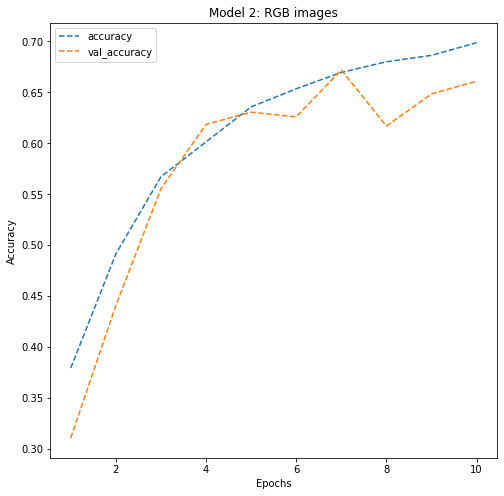

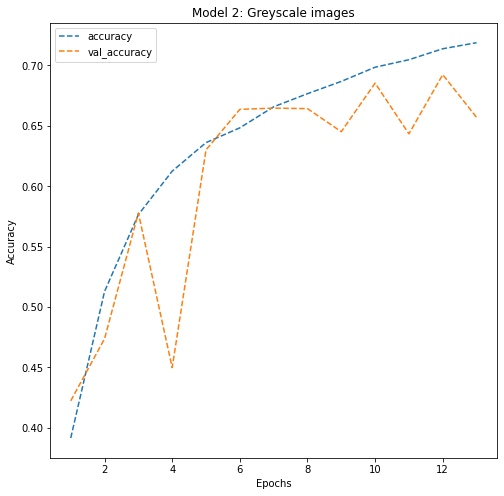

In [89]:
# Write your code to evaluate model's test performance
# Plotting the accuracies

dict_hist = history_rgb_model2.history

list_ep = [i for i in range(1, 11)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('Model 2: RGB images')

plt.legend()

plt.show()

dict_hist = history_greyscale_model2.history

list_ep = [i for i in range(1, 14)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.title('Model 2: Greyscale images')

plt.legend()

plt.show()

In [98]:
test_pred_rgb_model2 = model2_rgb.predict(test_set_rgb)

test_pred_rgb_model2 = np.argmax(test_pred_rgb_model2, axis = -1)

test_pred_greyscale_model2 = model2_greyscale.predict(test_set_greyscale)

test_pred_greyscale_model2 = np.argmax(test_pred_greyscale_model2, axis = -1)

4/4 [==============================] - 2s 431ms/step


Classification report for RGB images trained model2
              precision    recall  f1-score   support

           0       0.29      0.34      0.31        32
           1       0.28      0.34      0.31        32
           2       0.22      0.19      0.20        32
           3       0.33      0.25      0.29        32

    accuracy                           0.28       128
   macro avg       0.28      0.28      0.28       128
weighted avg       0.28      0.28      0.28       128



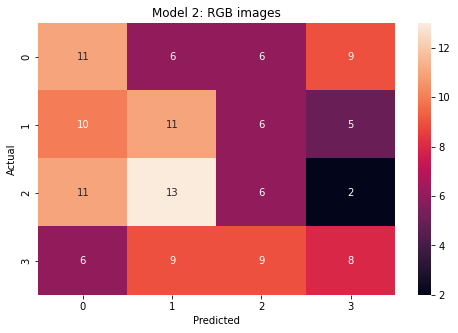

Classification report for Greyscale images trained model2
              precision    recall  f1-score   support

           0       0.22      0.28      0.25        32
           1       0.28      0.31      0.29        32
           2       0.38      0.28      0.32        32
           3       0.30      0.25      0.27        32

    accuracy                           0.28       128
   macro avg       0.29      0.28      0.28       128
weighted avg       0.29      0.28      0.28       128



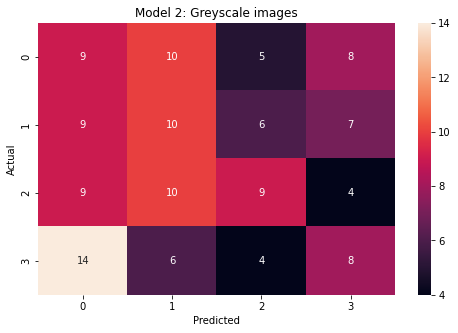

In [100]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report for RGB
print("Classification report for RGB images trained model2")

print(classification_report(FacesLabel_single, test_pred_rgb_model2))

# Plotting the heatmap using confusion matrix for RGB

cm = confusion_matrix(FacesLabel_single, test_pred_rgb_model2)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('Model 2: RGB images')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

# Printing the classification report for Greyscale
print("Classification report for Greyscale images trained model2")

print(classification_report(FacesLabel_single, test_pred_greyscale_model2))

# Plotting the heatmap using confusion matrix for Greyscale

cm = confusion_matrix(FacesLabel_single, test_pred_greyscale_model2)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.title('Model 2: Greyscale images')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Observations and Insights:**


*   Both RGB and Greyscale images were tested. As a matter of principle, images in Greyscale could be expected to be better for face classification than those in RGB becuase of the inherently sharper features of a Greyscale image.
*   From the dump of the values for an RGB image it can be seen that the values for all three colors (Red, Green, and Blue) are the same. This is has to be expected given that the original input images were in Greyscale. This should mean that there should be little in performance difference between a model trained on RGB images verses a model trained on Greyscale images.
*   Both RGB and Greyscale model2s stopped iterating through epochs early. For RGB it was after 10 epochs, for Greyscale it was after 13 epochs, instead of the programed 20 epochs. The training was ended becasue of the Early Stopping parameter which was set to stop training if the loss metric ceased to continue to decline, as it did.
*   The first train vs. validation accuracy plot is the response of the RGB model2, the second train vs. validation accuracy plot is the response of the Greyscale model2.  As can be seen from the train vs. validation accuracy plots, the model2 was slightly worse at classifing faces when trained using RGB images, an accuracy of about 69.87%, than Greyscale, an accuracy of about 71.88%, for a difference of about 2%. That they would yeild similar results is expected as the RGB face images are not truely in color and are actually just greyscale themselves.
*   Overall the improvement to validation accuracy levels off with additional epochs after epoch 8 so there does appear to be the start of some overfitting.
*   Both of these plots show that a validation accuracy lower than the training accuracy. Model1 used the Dropout feature to regularize the model weights but model2 did not use the Dropout feature. This is proof that the original problem seen in model1 was not due to an imbalance in validation to training images but rather due to the way regularization introduces some noise in loss value during training.
*   The array for the input images is accompanied by another array for storing the label of what kind of face the image actually corresponds to:
  *       [1, 0, 0, 0] corresponds to a face classed as 'Happy'.
  *       [0, 1, 0, 0] corresponds to a face classed as 'Neutral'.
  *       [0, 0, 1, 0] corresponds to a face classed as 'Sad'.
  *       [0, 0, 0, 1] corresponds to a face classed as 'Surprised'.
*   The classification report and confusion matrix for test data put into an RGB image trained model2 shows poor performance. The performance for test data put into a Greyscale image trained model2 shows even worse performance. Both precision and recall have large numbers of false positives and negatives for all predictions. Especially poor were the response to Sad or Surprised faces, these had a notible tendancy to be misclassified as Happy. 
*   Overall, performance on the test data was somewhat better with model2 than model1.


## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

### <u>**Proposed Approach**</u>

- **Potential techniques:** What different techniques should be explored?<br>
- **Overall solution design:** What is the potential solution design?<br>
- **Measures of success:** What are the key measures of success to compare different techniques?<br>